In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


Averaged value of SigmaX^2 is: 0.08313022001366963
Averaged value of SigmaX is: 0.2883231173764421
Sigma^2 = n*SigmaX^2 is: 0.08333333333333331
Sigma = sqrt(n)*SigmaX is: 0.28867513459481287


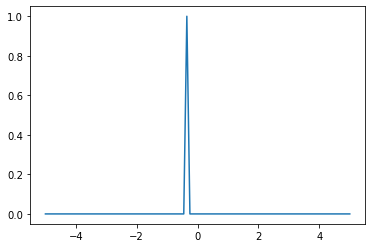

In [2]:
#This is a code to convince ourselves that the central limit theorem does what is says
n = 100000
def transl_amount(n):
    x = 0
    var = 0
    for i in range(n):
        rand = random.uniform(0,1)
        var += (rand - 0.5) ** 2
        x += rand
    transl = x/n
    variance = var/n
    return transl , variance

#m in this case is the number of proteins, or instances of translation
m = 1
buckets = np.linspace(-5,5,100)
counter = np.zeros(100)

sigma = np.sqrt(1/12)
sigmaX = sigma/np.sqrt(n)
varians = 0
for i in range(m):
    tal, variance = transl_amount(n)
    varians += variance
    for j in range(len(buckets)-1):
        if buckets[j] <= (tal-0.5)/sigmaX <= buckets[j+1]:
            counter[j] += 1
V = varians/m
plt.figure()
plt.plot(buckets,np.divide(counter,m))

print(f'Averaged value of SigmaX^2 is: {V}')
print(f'Averaged value of SigmaX is: {np.sqrt(V)}')
print(f'Sigma^2 = n*SigmaX^2 is: {n*sigmaX**2}')
print(f'Sigma = sqrt(n)*SigmaX is: {np.sqrt(n)*sigmaX}')
#The results show that n=10000 and m=1 is sufficient for 3 decimal places accuracy of the variance and std.

In [156]:
variance

0.08295685594877705

In [151]:
print(f'SigmaX^2 is: {sigmaX**2}')
print(f'SigmaX is: {sigmaX}')

SigmaX^2 is: 8.333333333333332e-06
SigmaX is: 0.0028867513459481286


The real variance is: 8.333333333333332e-06
The real std is: 0.0028867513459481286
The average variance is: 8.45332785800383e-06
The average std is: 0.002907460723381114
The variance quotient is: 1.0143993429604596
The std quotient is: 1.00717393878141


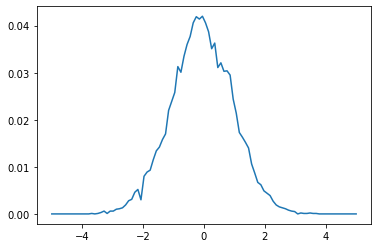

In [3]:
#Here the average variance of the collection of sample means are computed
n = 10000
def transl_amount(n):
    x = 0
    var = 0
    for i in range(n):
        rand = random.uniform(0,1)
        x += rand
    transl = x/n
    return transl

m = 10000
buckets = np.linspace(-5,5,100)
counter = np.zeros(100)
sigma = np.sqrt(1/12)
sigmaX = sigma/np.sqrt(n)
varians =  []
for i in range(m):
    tal = transl_amount(n)
    #Calculate variance of sample mean, scale by sigmaX
    var = (tal-0.5)**2
    varians.append(var)
    #Make histogram
    for j in range(len(buckets)-1):
        if buckets[j] <= (tal-0.5)/sigmaX <= buckets[j+1]:
            counter[j] += 1
#Average variance of sample mean
AvgVariance = sum(varians)/m
plt.figure()
plt.plot(buckets,np.divide(counter,m))
#The results show that there is a rather big discrepancy between the sample std and the
#limit std for only 16 proteins, but also the difference disappears as m increases.
print(f'The real variance is: {sigmaX**2}')
print(f'The real std is: {sigmaX}')
print(f'The average variance is: {AvgVariance}')
print(f'The average std is: {np.sqrt(AvgVariance)}')
print(f'The variance quotient is: {AvgVariance/(sigmaX**2)}')
print(f'The std quotient is: {np.sqrt(AvgVariance/(sigmaX**2))}')

In [254]:
V

0.9982980529167298

In [246]:
sigmaX

0.0028867513459481286

In [251]:
(tal-0.5)/sigmaX

0.24421165083117422